<center>
    <img src="http://sct.inf.utfsm.cl/wp-content/uploads/2020/04/logo_di.png" style="width:60%">
    <h1> INF285 - Computación Científica </h1>
    <h2> Finding 2 Chebyshev points graphically </h2>
    <h2> <a href="#acknowledgements"> [S]cientific [C]omputing [T]eam </a> </h2>
    <h2> Version: 1.05</h2>
</center>

## Table of Contents
* [Finding 2 Chebyshev points](#cheb)
* [Another interpretation](#another-interpretation)
* [Python Modules and Functions](#py)
* [Acknowledgements](#acknowledgements)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib as mpl
mpl.rcParams['font.size'] = 14
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
%matplotlib inline

<div id='cheb' />

## Finding 2 Chebyshev points

We compute them so we can compare them later.

In [3]:
n=2
i=1
theta1=(2*i-1)*np.pi/(2*n)
i=2
theta2=(2*i-1)*np.pi/(2*n)
c1=np.cos(theta1)
c2=np.cos(theta2)

Recall that the Chebyshev points are points that minimize the following expression:
$$
\displaystyle{\omega(x_1,x_2,\dots,x_n)=\max_{x} |(x-x_1)\,(x-x_2)\,\cdots\,(x-x_n)|}.
$$
This comes from the Interpolation Error Formula (I hope you remember it, otherwise see the textbook or the classnotes!). 
In this notebook, we will find the $\min$ for 2 points, 
this means:
$$
\begin{align*}
[x_1,x_2]&= \displaystyle{\mathop{\mathrm{argmin}}_{\widehat{x}_1,\widehat{x}_2\in [-1,1]}} \,\omega(\widehat{x}_1,\widehat{x}_2)\\
&=\displaystyle{\mathop{\mathrm{argmin}}_{\widehat{x}_1,\widehat{x}_2\in [-1,1]}}\,
\max_{x\in [-1,1]} |(x-\widehat{x}_1)\,(x-\widehat{x}_2)|.
\end{align*}
$$
For doing this, we first need to build $\omega(\widehat{x}_1,\widehat{x}_2)$,

In [4]:
N=50
x=np.linspace(-1,1,N)
w = lambda x1,x2: np.max(np.abs((x-x1)*(x-x2)))
wv=np.vectorize(w)

For instance, if you want to evaluate at $\widehat{x}_1=0.2$ and $\widehat{x}_2=0.5$ you get,

In [5]:
w(0.2,0.5)

1.7999999999999998

But a better value would be,

In [6]:
w(0.7,-0.7)

0.51

Thus, the idea is to find the minimim. 
Now we need to evaluate $\omega(x_1,x_2)$ over the domain $\Omega=[0,1]^2$.

In [7]:
[X,Y]=np.meshgrid(x,x)
W=wv(X,Y)

With this data, we can now plot the function $\omega(x_1,x_2)$ on $\Omega$. 
The minimun value of is shown by the color at the bottom of the colorbar.
By visual inspection, we see that we have two mins. 
They are located at the bottom right and top left.

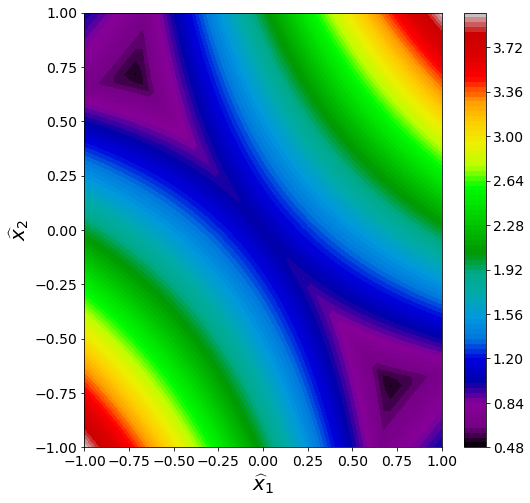

In [8]:
plt.figure(figsize=(8,8))
#plt.contourf(X, Y, W,100, cmap=cm.hsv, antialiased=False)
plt.contourf(X, Y, W,100, cmap=cm.nipy_spectral, antialiased=False)
plt.xlabel(r'$\widehat{x}_1$')
plt.ylabel(r'$\widehat{x}_2$')
plt.colorbar()
plt.show()

Finally, we have included the min in the plot and we see the agreement between the min of $\omega(x_1,x_2)$ and the Chebyshev points found.

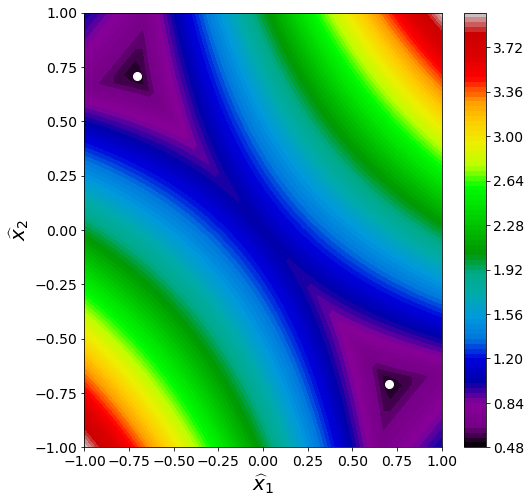

In [9]:
plt.figure(figsize=(8,8))
plt.contourf(X, Y, W,100, cmap=cm.nipy_spectral, antialiased=False)
plt.plot(c1,c2,'w.',markersize=16)
plt.plot(c2,c1,'w.',markersize=16)
plt.colorbar()
plt.xlabel(r'$\widehat{x}_1$') 
plt.ylabel(r'$\widehat{x}_2$')
plt.show()

<div id='another_interpretation' />

# Another interpretation
See sectio "Puntos de Chebyshev" to understand the plot on the left.
We are basically plotting the function,
$$
\displaystyle{\beta(x,x_1,x_2)=|(x-x_1)\,(x-x_2)|},
$$
where we set $x_1$ and $x_2$ and plot it for $x\in[-1,1]$.

In [10]:
beta = lambda x,x1,x2: np.abs((x-x1)*(x-x2))

x = np.linspace(-1,1,1000)
out_values = []
out_x1 = []
out_x2 = []

def show_cheb_function(x1=-0.5,x2=0.5):
    y = beta(x,x1,x2)
    plt.figure(figsize=(15,5))
    
    plt.subplot(1, 3, 1)
    plt.plot(x,y)
    iMax = np.argmax(y)
    plt.plot(x[iMax],y[iMax],'.',markersize=20)
    out_values.append(y[iMax])
    out_x1.append(x1)
    out_x2.append(x2)
    
    plt.plot(np.array([x1, x2]),np.zeros(2),'k.',markersize=20)
    plt.text(x1,0.1,r'$x_1$',fontsize=12,backgroundcolor='lightgray',ha='center')
    plt.text(x2,0.1,r'$x_2$',fontsize=12,backgroundcolor='lightgray',ha='center')
    plt.xlabel('x')
    plt.grid(True)
    
    plt.subplot(1, 3, 2)
    plt.contourf(X, Y, W,100, cmap=cm.nipy_spectral, antialiased=False)
    plt.plot(c1,c2,'w.',markersize=16)
    plt.plot(c2,c1,'w.',markersize=16)
    plt.plot(out_x1,out_x2,'-',markersize=12,color='orange',linewidth=3)
    plt.plot(x1,x2,'X',markersize=12,color='darkorange',linewidth=3)
    plt.colorbar()
    
    plt.subplot(1, 3, 3)
    plt.plot(np.arange(len(out_values)),out_values,'.-',color='orange')
    plt.grid()
    plt.xlabel('x')
    plt.title('Max value over differents selecion of parameters')
    
    plt.show()
    
interact(show_cheb_function,x1=(-1,1,0.01),x2=(-1,1,0.01))
    

interactive(children=(FloatSlider(value=-0.5, description='x1', max=1.0, min=-1.0, step=0.01), FloatSlider(val…

<function __main__.show_cheb_function(x1=-0.5, x2=0.5)>

<div id='py' />

## Python Modules and Functions

An interesting module:
https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.polynomials.chebyshev.html

<div id='acknowledgements' />

# Acknowledgements
* _Material created by professor Claudio Torres_ (`ctorres@inf.utfsm.cl`). DI UTFSM. _May 2018._
* _Update June 2020 - v1.02 - C.Torres_ : Fixing formatting issues.
* _Update May 2021 - v1.03 - C.Torres_ : Adding \widehat to the corresponding x's.
* _Update June 2021 - v1.04 - C.Torres_ : Format and explanation.
* _Update May 2022 - v1.05 - C.Torres_ : Adding section "Another interpretation"